In [1]:
#Do wykonania zadań niezbędne będzie pobranie bazy filmów oraz bazy gatunków:

#    Baza filmów

#    Baza gatunków

#    Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.
#
#    Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010
#    (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet 
#     wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym 
#     górnym rogu płótna, lecz poza obszarem osi. Przykład wykresu widoczny poniżej:


#    Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było
#    odczytać nazwę gatunku filmu.
#
#    Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?
#
#    Filmy, którego gatunku trwają średnio najdłużej (runtime)?
#
#    Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.

import pandas as pd
import matplotlib.pyplot as plt

baza_film = pd.read_csv('tmdb_movies.csv')
baza_gatunek = pd.read_csv('tmdb_genres.csv')
baza_film_Q3 = baza_film['vote_count'].quantile(0.75)
baza_filmQ3 = baza_film[baza_film['vote_count'] >= baza_film_Q3]
top_10_film = baza_filmQ3.sort_values('vote_average', ascending=False).head(10)
top_10_film

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
1881,1881,25000000,NaN,278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,1994-09-23,28341469,142.0,Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,18.0
3337,3337,6000000,http://www.thegodfather.com/,238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,1972-03-14,245066411,175.0,Released,An offer you can't refuse.,The Godfather,8.4,5893,18.0
3865,3865,3300000,http://sonyclassics.com/whiplash/,244786,en,Whiplash,"Under the direction of a ruthless instructor, ...",192.528841,2014-10-10,13092000,105.0,Released,The road to greatness can take you to the edge.,Whiplash,8.3,4254,18.0
1818,1818,22000000,http://www.schindlerslist.com/,424,en,Schindler's List,The true story of how businessman Oskar Schind...,104.469351,1993-11-29,321365567,195.0,Released,"Whoever saves one life, saves the world entire.",Schindler's List,8.3,4329,18.0
2294,2294,15000000,http://movies.disney.com/spirited-away,129,ja,千と千尋の神隠し,A ten year old girl who wanders away from her ...,118.968562,2001-07-20,274925095,125.0,Released,The tunnel led Chihiro to a mysterious town...,Spirited Away,8.3,3840,14.0
2731,2731,13000000,NaN,240,en,The Godfather: Part II,In the continuing saga of the Corleone crime f...,105.792936,1974-12-20,47542841,200.0,Released,"I don't feel I have to wipe everybody out, Tom...",The Godfather: Part II,8.3,3338,18.0
3232,3232,8000000,NaN,680,en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,1994-10-08,213928762,154.0,Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,53.0
662,662,63000000,http://www.foxmovies.com/movies/fight-club,550,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,1999-10-15,100853753,139.0,Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,18.0
1990,1990,18000000,http://www.starwars.com/films/star-wars-episod...,1891,en,The Empire Strikes Back,"The epic saga continues as Luke Skywalker, in ...",78.517830,1980-05-17,538400000,124.0,Released,The Adventure Continues...,The Empire Strikes Back,8.2,5879,12.0
690,690,60000000,http://thegreenmile.warnerbros.com/,497,en,The Green Mile,A supernatural tale set on death row in a Sout...,103.698022,1999-12-10,284600000,189.0,Released,Miracles do happen.,The Green Mile,8.2,4048,14.0


In [2]:
#Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010
#    (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet 
#     wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym 
#     górnym rogu płótna, lecz poza obszarem osi. Przykład wykresu widoczny poniżej:
baza_film = baza_film.dropna(subset=['release_date'])
baza_film['release_date'] = pd.to_datetime(baza_film['release_date'])
baza_film['year'] = baza_film['release_date'].dt.year

baza_film_2010_2016 = baza_film[(baza_film['year'] >= 2010) & (baza_film['year'] <= 2016)]
baza_film_2010_2016 = baza_film_2010_2016.copy()
baza_film_2010_2016['average_revenue'] = baza_film_2010_2016['revenue'].mean()
baza_film_2010_2016['average_budget'] = baza_film_2010_2016['budget'].mean()
average_revenue = baza_film_2010_2016.groupby('year')['revenue'].mean()
average_budget = baza_film_2010_2016.groupby('year')['budget'].mean()

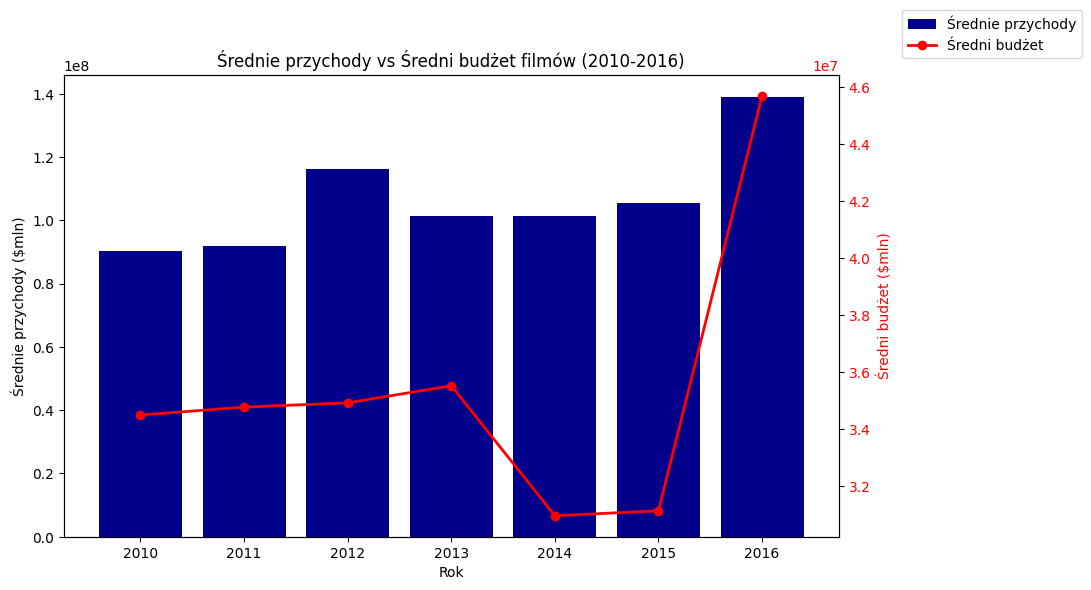

In [3]:
# Tworzymy wykres
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(average_revenue.index, average_revenue, color='darkblue', label='Średnie przychody')
ax1.set_xlabel('Rok')
ax1.set_ylabel('Średnie przychody ($mln)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(average_budget.index, average_budget, color='red', marker='o', label='Średni budżet', linestyle='-', linewidth=2)
ax2.set_ylabel('Średni budżet ($mln)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.title('Średnie przychody vs Średni budżet filmów (2010-2016)')

fig.legend(loc='upper right', bbox_to_anchor=(1.15, 1))


plt.show()


In [4]:
#Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było
#    odczytać nazwę gatunku filmu.

baza_gatunek
baza_film = pd.merge(baza_film, baza_gatunek, how = 'left', left_on = 'genre_id', right_on = 'Unnamed: 0')
baza_film.head(5)


,Unnamed: 0_x,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,year,Unnamed: 0_y,genres
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,2009,28.0,Action
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0,2007,12.0,Adventure
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,2015,28.0,Action
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,2012,28.0,Action
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0,2012,28.0,Action


In [6]:
#Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?
genres_counts = baza_film['genres'].value_counts()
genres_counts_max = genres_counts.max()
max_genre = genres_counts.idxmax()
print(f"Gatunek z największą liczbą filmów: {max_genre} (Liczba filmów: {genres_counts_max})")

movies_in_genres_count = baza_film[baza_film['genres'] == max_genre]
movies_in_genres_count = baza_film['original_title'].value_counts().sum()
print(f"W bazie znajduje sie {movies_in_genres_count} filmów {max_genre}")

Gatunek z największą liczbą filmów: Drama (Liczba filmów: 1207)
W bazie znajduje sie 4802 filmów Drama


In [22]:
#Filmy, którego gatunku trwają średnio najdłużej (runtime)?
genres_runetime = baza_film.groupby('genres')['runtime'].mean()
genres_runetime_1 = genres_runetime.max()
genres_runetime_max = genres_runetime.idxmax()
print(f"Filmy z gatunku {genres_runetime_max} trwają średnio najdłużej, bo aż {genres_runetime_1} min")

Filmy z gatunku History trwają średnio najdłużej, bo aż 133.96 min


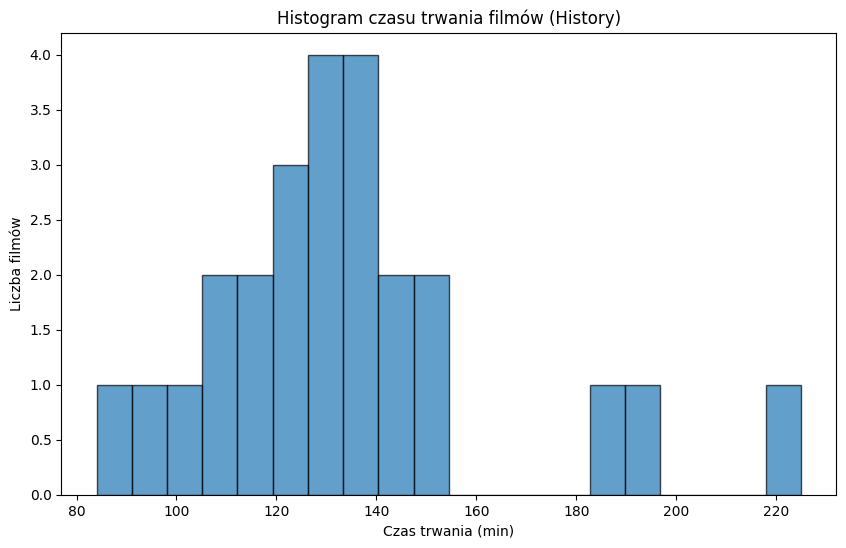

In [25]:
#Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.
selected_movies = baza_film[baza_film['genres'] == genres_runetime_max]

# Tworzenie histogramu
plt.figure(figsize=(10, 6))
plt.hist(selected_movies['runtime'].dropna(), bins=20, edgecolor='black', alpha=0.7)

# Dodanie tytułów i etykiet
plt.title(f'Histogram czasu trwania filmów ({genres_runetime_max})')
plt.xlabel('Czas trwania (min)')
plt.ylabel('Liczba filmów')

# Wyświetlenie wykresu
plt.show()